# Title: Analyzing and Predicting the Success of Projects on Kickstarter 

## Section 1: Business Understanding

### Motivation: the project motivation is to predict wither a project will success or not based on certain features. Also, to know how those features are related to the project success. 

In [6]:
## importing main libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('All main laibraries are imported')

All main laibraries are imported


## Section 2: Data Understanding

In [7]:
df = pd.read_csv('ks-projects-201801.csv')
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [8]:
# Getting general view about the dataframe and check if it has missing data or wrong data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [9]:
# Looking for duplicated rows
len(df[df.duplicated()])

0

#### First it can be seen from the information above:
* There are 15 columns and 378,661 records
* There are 3801 records missing. 3797 records are missing on the [usd pledged] & 4 records are missing from the name columns.
* The [lanuched, deadline] columns data type is not accurate, it should be date instead of object.
* No duplicated rows were found

#### Second, from the infos related to the dataframe, it can be seen that there are three columns similar to each other, which are: pledged, usd pledged, and usd_pledged_real. The first one is the pledged amount of money in the country's currency. The other two are the converted ampount to US dollar. However, usd_pledged_real is the amount converted by Fixer.io API. While "usd pledged" is converted by kickstarter. I will use usd_pledged_real to substitute the other two columns for two reasons:
1. To have uniformed and consistancy when all the values represented by the same unit (US dollar).
2. It has to be mentioned that "usd_goal_real" is the real fund needed converted by Fixer.io API. This will also allows to mainatin consistance, since we are using the same source of information and conversion.


*Now I move to the next step which is data preparation*

## Section 3: Data Preparing

#### In this section I will clean the data by applying the following:
- Removing unneccessery columns.
    * Removing [usd pledged] since [usd_pledged_real] column has the same data.
    * Removing ["ID", "currency"] since they won't add much to the analysis
    *  Removing [goal] since [usd_goal_real] column has the same data.
- Removing missing values from [name] column since they are only 4 missing records & they only represent 0.001% of the whole data set
- Changing the data type for [Launched, deadline] columns.

In [10]:
df.drop(columns = ['usd pledged', 'ID', 'currency', 'goal', 'pledged'], axis = 1, inplace = True)

In [11]:
# dropping missing values
df_drop_missing = df.dropna()

In [12]:
# Verifying that no missing data exists in the updated data set
df_drop_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378657 entries, 0 to 378660
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              378657 non-null  object 
 1   category          378657 non-null  object 
 2   main_category     378657 non-null  object 
 3   deadline          378657 non-null  object 
 4   launched          378657 non-null  object 
 5   state             378657 non-null  object 
 6   backers           378657 non-null  int64  
 7   country           378657 non-null  object 
 8   usd_pledged_real  378657 non-null  float64
 9   usd_goal_real     378657 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 31.8+ MB


In [13]:
# changing the data type for launched column to date
df_drop_missing['launched']= pd.to_datetime(df_drop_missing['launched'])

<ipython-input-13-1ce1838019a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop_missing['launched']= pd.to_datetime(df_drop_missing['launched'])


In [14]:
# changing the data type for deadline column to date
df_drop_missing['deadline']= pd.to_datetime(df_drop_missing['deadline'])

<ipython-input-14-e95e1d9e9fba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop_missing['deadline']= pd.to_datetime(df_drop_missing['deadline'])


In [15]:
df_drop_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378657 entries, 0 to 378660
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   name              378657 non-null  object        
 1   category          378657 non-null  object        
 2   main_category     378657 non-null  object        
 3   deadline          378657 non-null  datetime64[ns]
 4   launched          378657 non-null  datetime64[ns]
 5   state             378657 non-null  object        
 6   backers           378657 non-null  int64         
 7   country           378657 non-null  object        
 8   usd_pledged_real  378657 non-null  float64       
 9   usd_goal_real     378657 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 31.8+ MB


#### An additional column can be made to get the difference between the deadline date and the lunched date in days

In [16]:
df_drop_missing['time_diff_in_days'] = (df_drop_missing.deadline - df_drop_missing.launched).astype('timedelta64[h]')/24
pd.options.display.float_format = "{:,.2f}".format

<ipython-input-16-f63e8f310f81>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop_missing['time_diff_in_days'] = (df_drop_missing.deadline - df_drop_missing.launched).astype('timedelta64[h]')/24


In [17]:
# making a copy of df_drop_missing
cleaned_df = df_drop_missing.copy()
# moving target column to be the last
cleaned_df['State'] = cleaned_df['state']
cleaned_df.drop(columns = ['state'], axis = 1, inplace = True)
# checking how the new df looks like
cleaned_df.head()

,name,category,main_category,deadline,launched,backers,country,usd_pledged_real,usd_goal_real,time_diff_in_days,State
0,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11 12:12:28,0,GB,0.00,"1,533.95",58.46,failed
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02 04:43:57,15,US,"2,421.00","30,000.00",59.79,failed
2,Where is Hank?,Narrative Film,Film & Video,2013-02-26,2013-01-12 00:20:50,3,US,220.00,"45,000.00",44.96,failed
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-04-16,2012-03-17 03:24:11,1,US,1.00,"5,000.00",29.83,failed
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,2015-08-29,2015-07-04 08:35:03,14,US,"1,283.00","19,500.00",55.62,canceled


## Section 3: Data Analysis

#### Since our data frame is clean and proporely structured, we can move on with the analysis to see the distribution of our information, and how they are related to the target variable "State"

In [18]:
# we can explore the different states of a project
set(cleaned_df.State)

{'canceled', 'failed', 'live', 'successful', 'suspended', 'undefined'}

**As it can be seen there are 6 states for any project. Two states can be defined as project didn't success, which are the failed and canceled ones. For the lived, suspended, and undifiend ones, they have to be investigated furtehr to deterimne if they will be changed as failure, deleted, or utilized deffernelty in our analysis**<br>
<br>
**The first step to check the recent date under the deadline column. If the deadline is beyond 2018 it means the project state can be keept as it is. If the recent deadline is within 2018 then the project state shall be changed**<br>
<br>
**The second step to look at the backers column if it is zero or not. If it is not zero then the project is probably successful one. Else, the project is a failure, because you can't raise a fund with out having a backers or supportes. The last step, if the backers number is not zero, is to see if the goal fund is met or not. If yes, then the chances of the project being successful are really high and can change the project state to successful. (Unless if it is stated as canceled or failed).**


In [19]:
# first we check the recent date in the deadlline column
cleaned_df.deadline.max()

Timestamp('2018-03-03 00:00:00')

**as seen above the recent date in the deadline column is March 2018. This means all three states mentioend earlier: live, suspended, or undifined shall be changed to either successful or failure. This will be determined after applying the remaining verification process**

### First: Checking the project state where the number of supporters is zero

In [20]:
set(cleaned_df[cleaned_df['backers'] == 0].State)

{'canceled', 'failed', 'live', 'successful', 'suspended', 'undefined'}

In [21]:
len(cleaned_df[cleaned_df['backers'] == 0])

55608

In [22]:
zero_supporters = cleaned_df[cleaned_df['backers'] == 0]
zero_supporters.groupby('State').State.agg('count')

State
canceled      12035
failed        38742
live            549
successful      105
suspended       615
undefined      3562
Name: State, dtype: int64

In [23]:
remove1 = zero_supporters[zero_supporters.usd_pledged_real != 0] #Those data can't be real, as you can't collect any fund with no supporters
remove1

,name,category,main_category,deadline,launched,backers,country,usd_pledged_real,usd_goal_real,time_diff_in_days,State
169,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,2014-09-20,2014-08-06 21:28:36,0,"N,0""",555.00,"6,500.00",44.08,undefined
328,Duncan Woods - Chameleon EP,Music,Music,2015-08-25,2015-08-04 12:05:17,0,"N,0""","3,402.08","3,211.53",20.46,undefined
632,The Making of Ashley Kelley's Debut Album,Music,Music,2015-04-09,2015-03-10 20:06:13,0,"N,0""","3,576.00","3,500.00",29.12,undefined
647,Butter Side Down Debut Album,Music,Music,2015-11-26,2015-11-02 22:09:19,0,"N,0""","7,007.80","6,000.00",23.04,undefined
749,Chase Goehring debut EP,Music,Music,2016-03-21,2016-02-23 03:09:49,0,"N,0""","3,660.38","3,000.00",26.83,undefined
...,...,...,...,...,...,...,...,...,...,...,...
378219,Otter's First Full Length Album,Music,Music,2015-12-31,2015-12-01 00:25:06,0,"N,0""","6,065.26","5,000.00",29.96,undefined
378233,"EQUUS International Film Festival®, all-equine...",Film & Video,Film & Video,2015-02-03,2014-12-05 04:19:14,0,"N,0""",10.00,"7,500.00",59.79,undefined
378303,Emily 2050 - Short Film,Film & Video,Film & Video,2014-05-23,2014-04-08 00:30:09,0,"N,0""","2,845.61","2,752.04",44.96,undefined
378434,Matthew Stephens Music,Music,Music,2016-02-05,2016-01-06 21:59:23,0,"N,0""",235.00,"5,000.00",29.08,undefined


**It can be seen above that there 55608 rows have zero supporters, 3082 out them can't be real and must be excluded because there is no way to determine if the number of backers is actually zero, and since no fund can be collected when there are no backers. The remaining projects, their states should be changed to failure because as zero supporters means zero fund**

### Second: Checking the project state where the number of supporters is not zero & the fund requested is fully met

In [24]:
Non_zero_supporters = cleaned_df[cleaned_df['backers'] != 0]

In [25]:
goal_met = Non_zero_supporters[Non_zero_supporters.usd_pledged_real - Non_zero_supporters.usd_goal_real == 0]

In [26]:
len(goal_met)

4119

In [27]:
goal_met.groupby('State').State.agg('count')

State
canceled        48
failed           2
live            12
successful    4052
suspended        5
Name: State, dtype: int64

In [28]:
goal_met[goal_met.State != 'successful']

,name,category,main_category,deadline,launched,backers,country,usd_pledged_real,usd_goal_real,time_diff_in_days,State
990,Tiddly Trailer Bar Co.,Drinks,Food,2018-01-02,2017-11-03 21:36:22,36,US,"9,500.00","9,500.00",59.08,live
4985,"Mazie Meadows Morning Show Podcast, Season 2",Performance Art,Art,2018-01-22,2017-12-23 00:14:45,1,US,500.00,500.00,29.96,live
7102,Namespace (Canceled),Mobile Games,Games,2015-03-18,2015-02-08 13:58:17,17,GB,148.53,148.53,37.42,canceled
15289,Filmdreh in Wien,Drama,Film & Video,2018-02-11,2017-12-16 09:01:57,1,CH,102.97,102.97,56.58,live
20097,Help get my boyfriend across the state to me! ...,Rock,Music,2015-05-20,2015-04-20 23:28:17,1,US,50.00,50.00,29.00,suspended
...,...,...,...,...,...,...,...,...,...,...,...
337790,From Neurons to Nirvana: The Great Medicines,Documentary,Film & Video,2011-09-23,2011-07-25 20:35:41,113,US,"40,000.00","40,000.00",59.12,failed
341424,Battlestuen (Canceled),Film & Video,Film & Video,2015-01-17,2014-12-18 19:22:31,11,DK,376.13,376.13,29.17,canceled
351431,Help Me I'm Poor But Really Want This Cute Ass...,Couture,Fashion,2014-12-26,2014-12-01 23:58:37,11,US,109.00,109.00,24.00,suspended
352078,Slinky Race (Canceled),Live Games,Games,2014-08-17,2014-07-18 02:39:14,1,US,100.00,100.00,29.88,canceled


In [29]:
remove2 = goal_met[goal_met['State'].isin(['live', 'suspended'])]
remove2

,name,category,main_category,deadline,launched,backers,country,usd_pledged_real,usd_goal_real,time_diff_in_days,State
990,Tiddly Trailer Bar Co.,Drinks,Food,2018-01-02,2017-11-03 21:36:22,36,US,"9,500.00","9,500.00",59.08,live
4985,"Mazie Meadows Morning Show Podcast, Season 2",Performance Art,Art,2018-01-22,2017-12-23 00:14:45,1,US,500.00,500.00,29.96,live
15289,Filmdreh in Wien,Drama,Film & Video,2018-02-11,2017-12-16 09:01:57,1,CH,102.97,102.97,56.58,live
20097,Help get my boyfriend across the state to me! ...,Rock,Music,2015-05-20,2015-04-20 23:28:17,1,US,50.00,50.00,29.00,suspended
21157,Monster Wings Funding,Film & Video,Film & Video,2018-01-12,2017-11-13 01:05:12,8,US,800.00,800.00,59.92,live
37231,"Data Boss: easily find all your data anytime, ...",Software,Technology,2018-01-28,2017-12-24 17:03:30,25,US,500.00,500.00,34.25,live
45873,Coffee at Midnight | A Thesis Film by Avery Du...,Narrative Film,Film & Video,2018-01-03,2017-11-29 17:36:13,27,US,"5,000.00","5,000.00",34.25,live
52214,Cinego - Meet Your Personal Immersive 4K Cinema,Technology,Technology,2018-01-09,2017-12-30 19:02:02,3,US,"1,000.00","1,000.00",9.17,live
71729,I'll take some of that hard earned cash (Suspe...,Comedy,Film & Video,2015-06-21,2015-05-22 00:53:34,1,GB,23.59,23.59,29.96,suspended
84507,LIKE THERE'S NO TOMORROW,Immersive,Theater,2018-01-02,2017-12-12 14:10:56,17,DE,481.80,481.80,20.38,live


**From above we can see that there projects that has supporters and met their fund goals yet they are not successful. Could this be related to the number of days between the project lunching date and the deadline? or could this be related to the main category of the project?** <be> 

**However, for the projects that are classified as *live* or *suspended* they will be removed from the data set, since there is no way to determine if they should be classified as failure or successful. Moreover, they are only 12 observation so removing them won't imapct the results as we have huge number of data**


In [30]:
df_new = cleaned_df.copy()

In [31]:
df_new.drop(remove1.index, inplace = True)

In [32]:
df_new.drop(remove2.index, inplace = True)

In [33]:
len(cleaned_df) - len(df_new)

3099

#### Suspecious rows were removed. Total removed columns are 3099 out of 378657, which represents only 0.8% of the whole data set
#### Now further investigation is needed regarding other columns & regarding the project state of undefined, and live as both of these values don't make any sense

In [34]:
df_new.groupby('State').State.agg('count')

State
canceled       38769
failed        197630
live            2787
successful    133851
suspended       1838
undefined        683
Name: State, dtype: int64

In [35]:
(df_new['country'].value_counts()/df_new['country'].count())*100

US     77.91
GB      8.97
CA      3.93
AU      2.09
DE      1.11
FR      0.78
IT      0.77
NL      0.76
ES      0.61
SE      0.47
MX      0.47
NZ      0.39
DK      0.30
IE      0.22
CH      0.20
N,0"    0.19
NO      0.19
HK      0.16
BE      0.16
AT      0.16
SG      0.15
LU      0.02
JP      0.01
Name: country, dtype: float64

There are two observations regarding the column of country:
1. It is imbalance since most of the projects coming from US, almost 80%
2. The value of N,0" has no meaning, hence it needs get removed but after I look at the projects states assoicated with this value to ensure I don't remove important columns that would disturb my analysis and model later on

In [36]:
df_new.groupby('State').agg('mean')

,backers,usd_pledged_real,usd_goal_real,time_diff_in_days
State,,,,
canceled,25.99,"2,340.30","75,593.36",37.68
failed,16.43,"1,320.97","63,183.42",34.59
live,68.31,"5,885.23","62,795.34",39.23
successful,264.13,"22,664.49","9,535.70",31.57
suspended,105.53,"9,342.54","175,953.51",43.95
undefined,0.00,0.00,"4,241.50",32.84


**Since "Undefined" projects has zero backers & zero pledged fund, it needs to be investigated more before deciding if needs to be dropped or changed to failure**

In [37]:
undefined = df_new[df_new['State'] == 'undefined']

In [38]:
set(undefined.country), len(undefined)

({'N,0"'}, 683)

In [39]:
N0 = df_new[df_new['country'] == 'N,0"']

In [40]:
set(N0.State), len(N0)

({'canceled', 'failed', 'live', 'undefined'}, 718)

In [41]:
df_new.drop(df_new.loc[df_new['country']=='N,0"'].index, inplace=True)

In [42]:
df_new.groupby('State').agg('mean')

,backers,usd_pledged_real,usd_goal_real,time_diff_in_days
State,,,,
canceled,26.00,"2,341.03","75,613.45",37.68
failed,16.43,"1,321.12","63,189.89",34.59
live,68.34,"5,887.35","62,808.90",39.23
successful,264.13,"22,664.49","9,535.70",31.57
suspended,105.53,"9,342.54","175,953.51",43.95


In [43]:
(df_new['State'].value_counts()/df_new['State'].count())*100

failed       52.72
successful   35.71
canceled     10.34
live          0.74
suspended     0.49
Name: State, dtype: float64

In [44]:
df_new[df_new['State'] == 'live']; 

It can be seen that projects state of live doesn't make any sense and since those projects deadline has passed and apperantly didn't reach to their target fund, it is better to convert them to failed

In [45]:
df_new.loc[df_new['State'] == 'live', 'State'] = 'failed'

In [46]:
(df_new['main_category'].value_counts()/df_new['main_category'].count())*100

Film & Video   16.72
Music          13.21
Publishing     10.51
Games           9.40
Technology      8.69
Design          8.02
Art             7.51
Food            6.56
Fashion         6.08
Theater         2.91
Comics          2.89
Photography     2.88
Crafts          2.35
Journalism      1.27
Dance           1.00
Name: main_category, dtype: float64

In [47]:
df_new.head()

,name,category,main_category,deadline,launched,backers,country,usd_pledged_real,usd_goal_real,time_diff_in_days,State
0,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11 12:12:28,0,GB,0.00,"1,533.95",58.46,failed
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02 04:43:57,15,US,"2,421.00","30,000.00",59.79,failed
2,Where is Hank?,Narrative Film,Film & Video,2013-02-26,2013-01-12 00:20:50,3,US,220.00,"45,000.00",44.96,failed
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-04-16,2012-03-17 03:24:11,1,US,1.00,"5,000.00",29.83,failed
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,2015-08-29,2015-07-04 08:35:03,14,US,"1,283.00","19,500.00",55.62,canceled


Text(0.5, 1.0, 'Project State vs The number of backers')

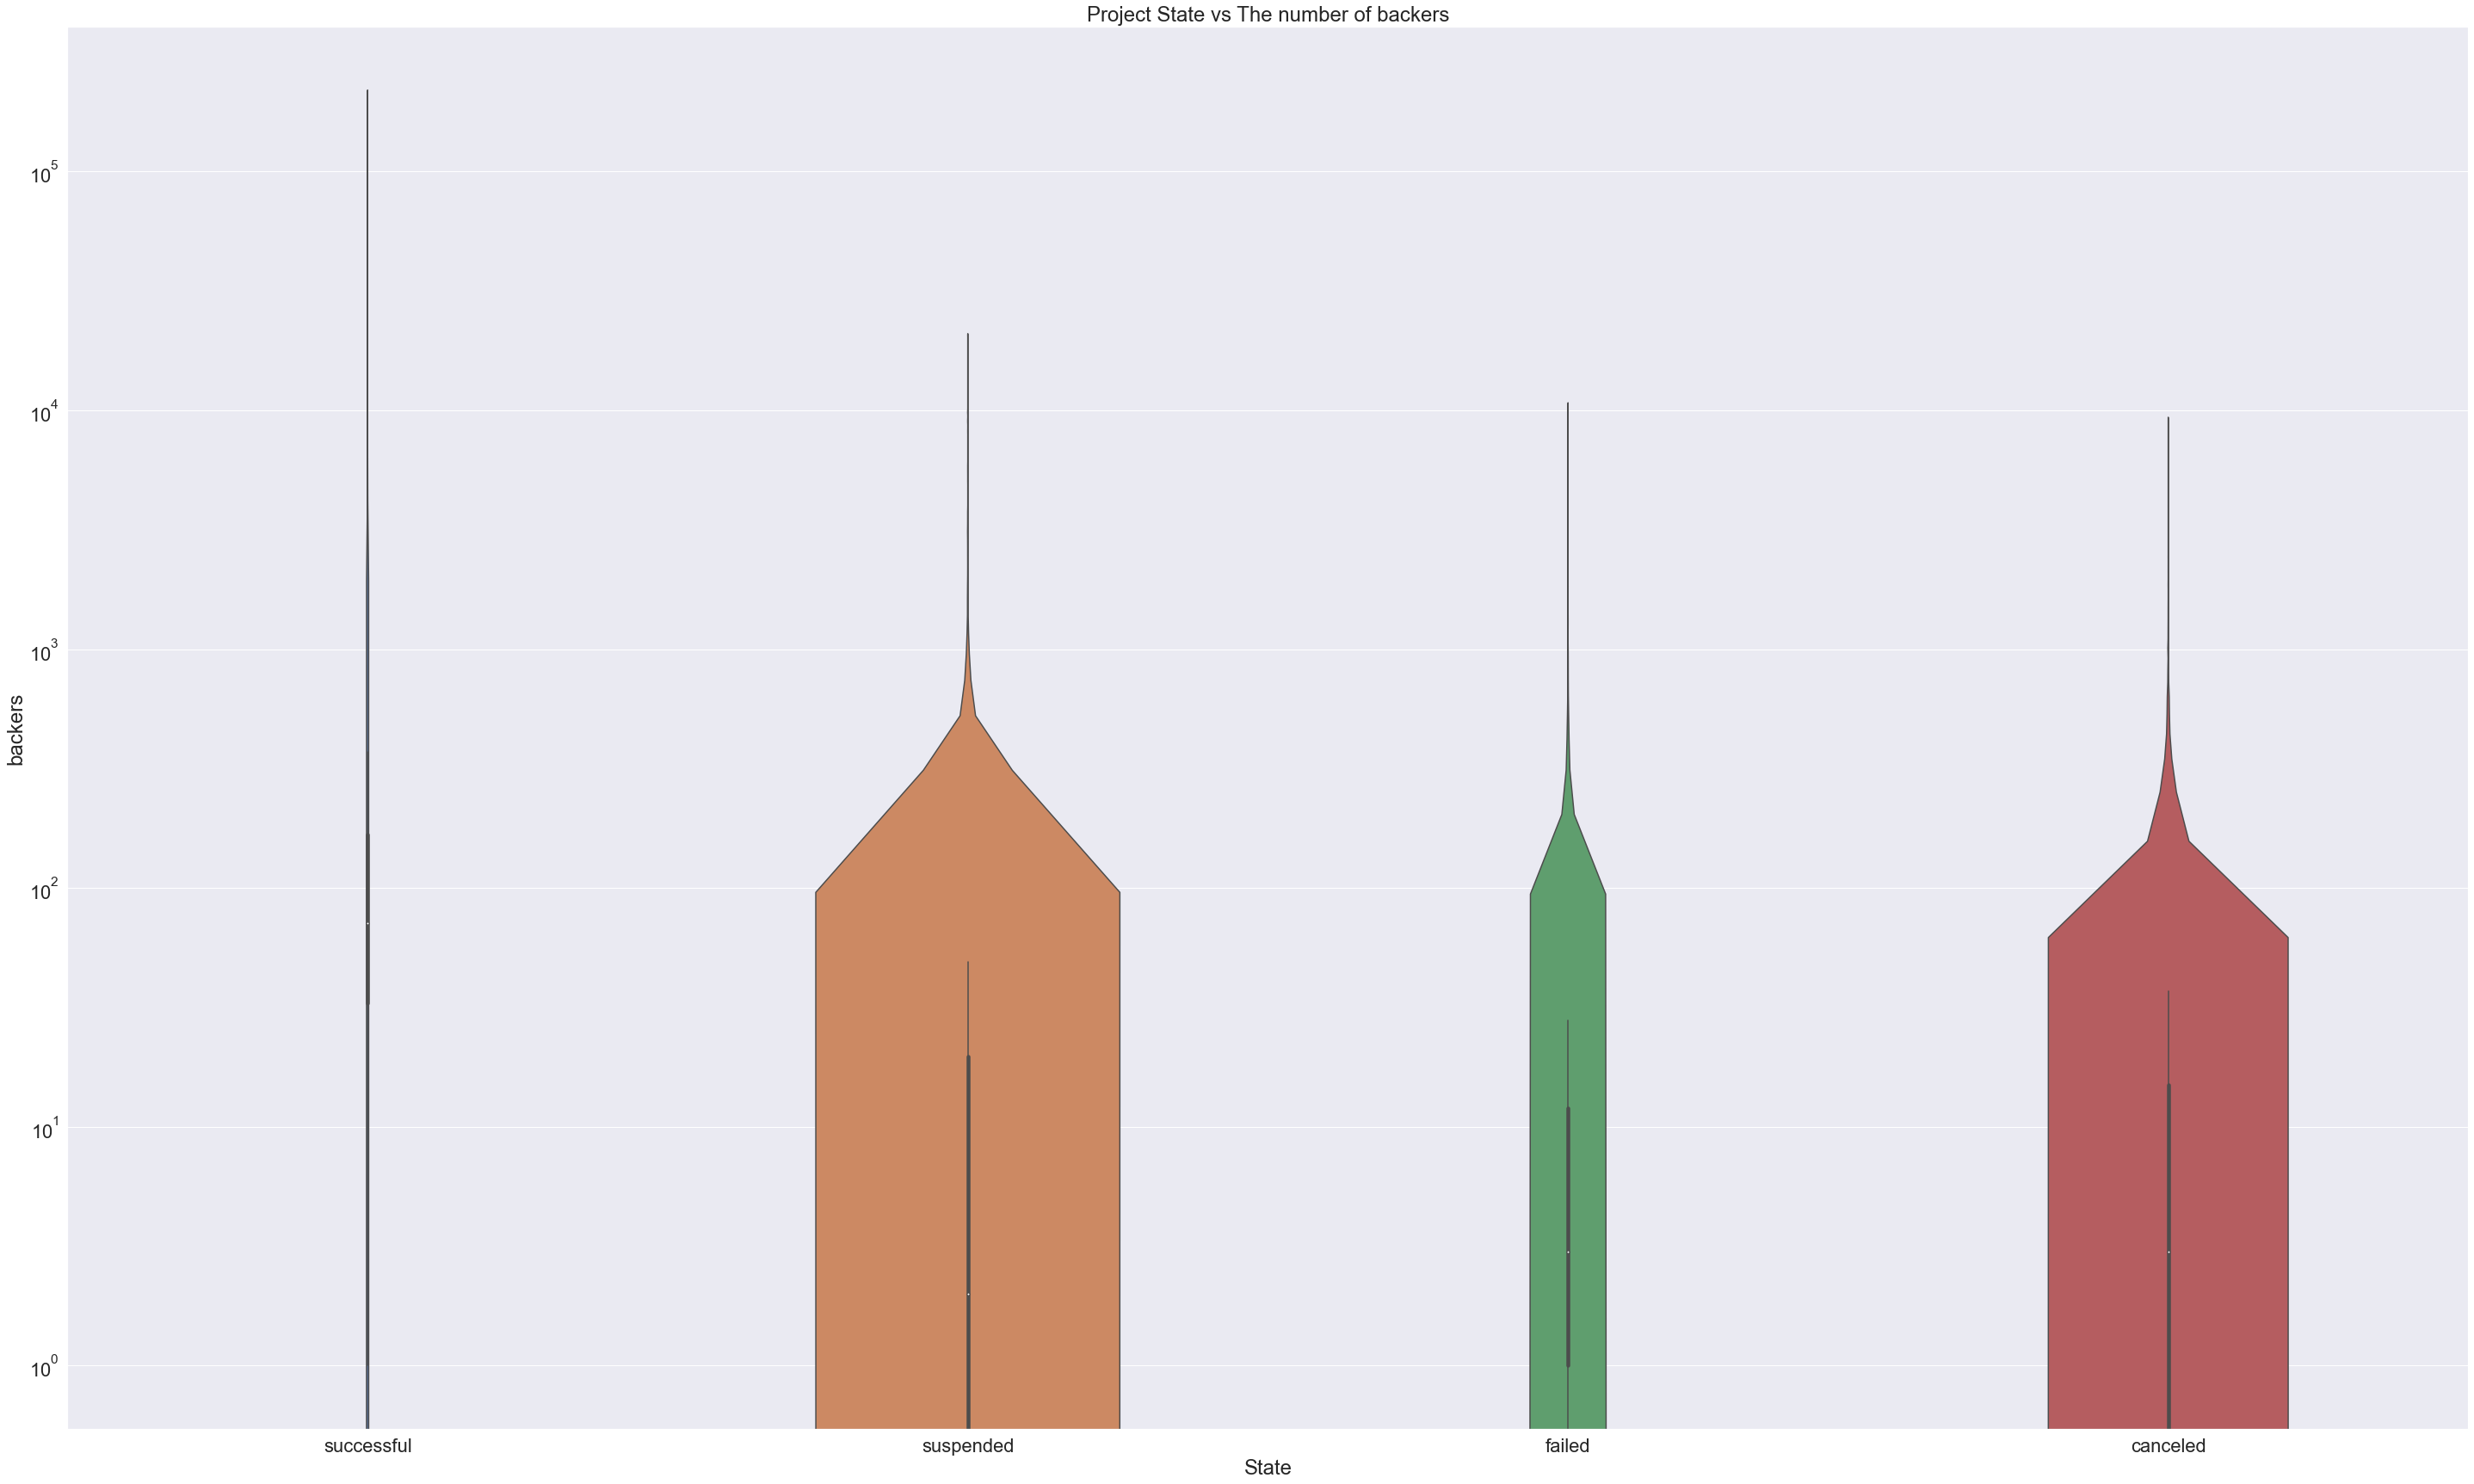

In [48]:
sns.set(rc={'figure.figsize':(50,30)})
sns.set(font_scale = 2)
ax = sns.violinplot(x="State",y="backers",  data=df_new, order = ['successful', 'suspended', 'failed', 'canceled'], scale_hue=False)
ax.set_yscale("log")
plt.title("Project State vs The number of backers")

**From the above figure and table, it can be seen that the number of backers is very high for successful project, high means, and low distribution. While for unsuccessful projects thy have high variance and low mean of backers.**

Text(0.5, 1.0, 'Project State vs The number of backers')

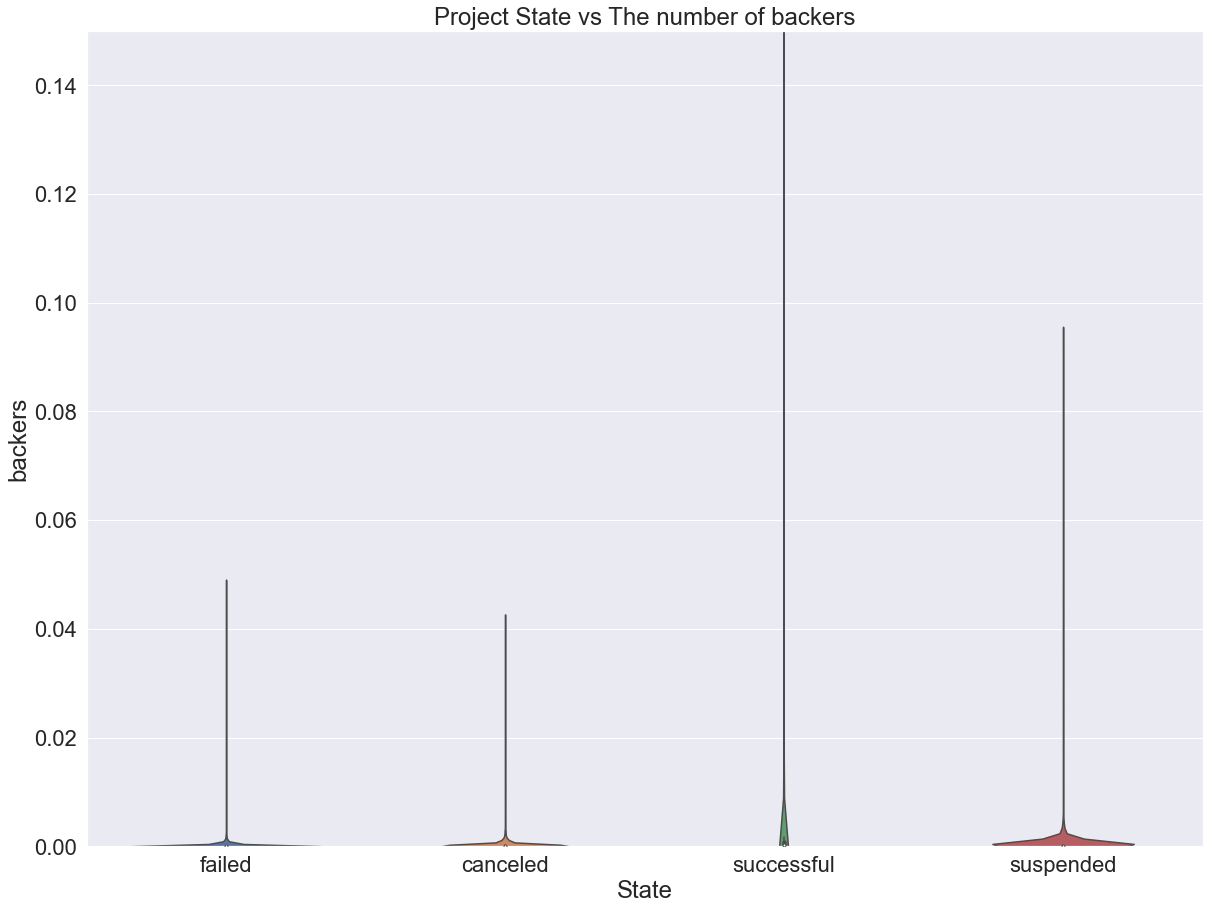

In [49]:
sns.set(rc={'figure.figsize':(20,15)})
sns.set(font_scale = 2)
y = df_new['backers']/df_new['backers'].max()
ax = sns.violinplot(x="State",y=y,  data=df_new)
ax.set_ylim(0, 0.15);
plt.title("Project State vs The number of backers")

Text(0.5, 1.0, 'Project State vs The number of days for completing the project')

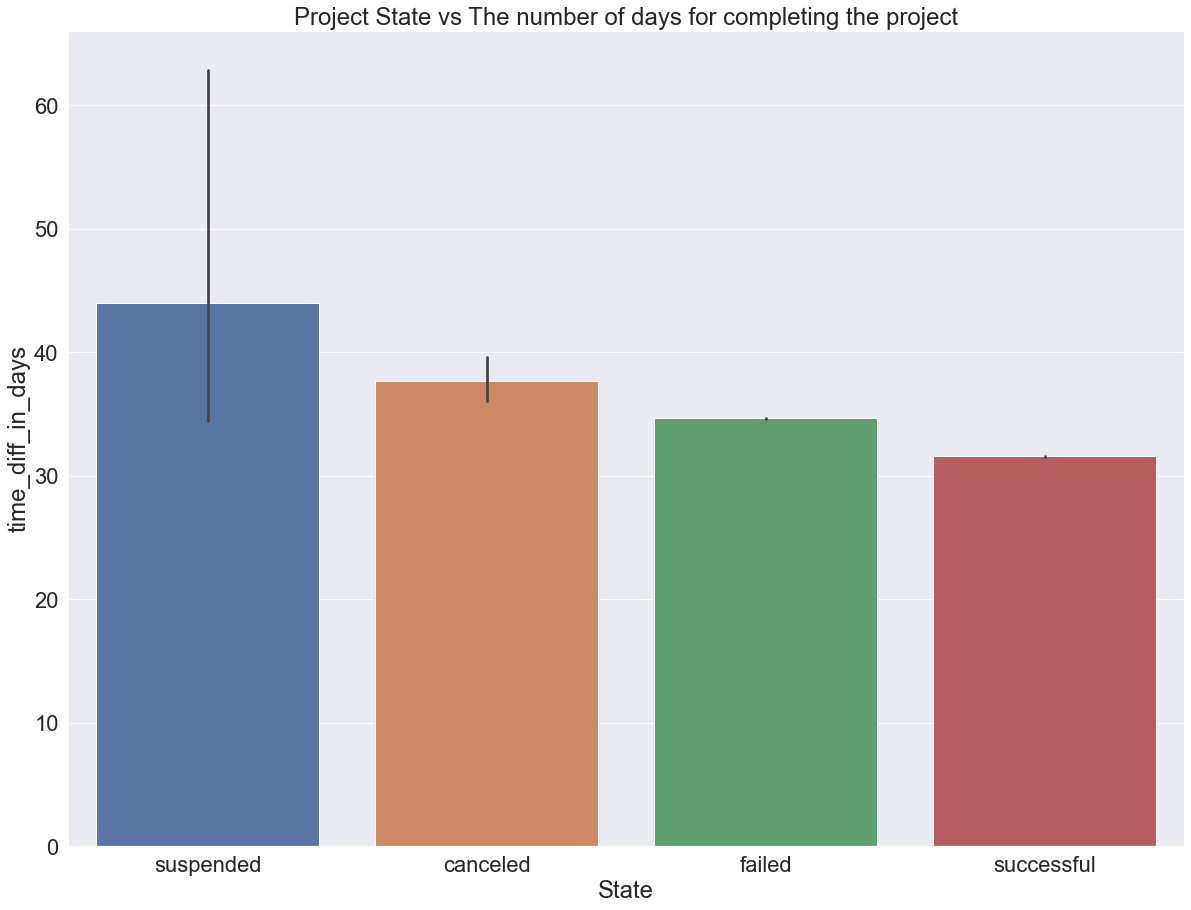

In [50]:
sns.set(rc={'figure.figsize':(20,15)})
sns.set(font_scale = 2)
ax = sns.barplot(x="State",y="time_diff_in_days",  data=df_new, order = ['suspended', 'canceled', 'failed', 'successful'])
plt.title("Project State vs The number of days for completing the project")

Text(0.5, 1.0, 'Project State vs The number of days for compeliting the project')

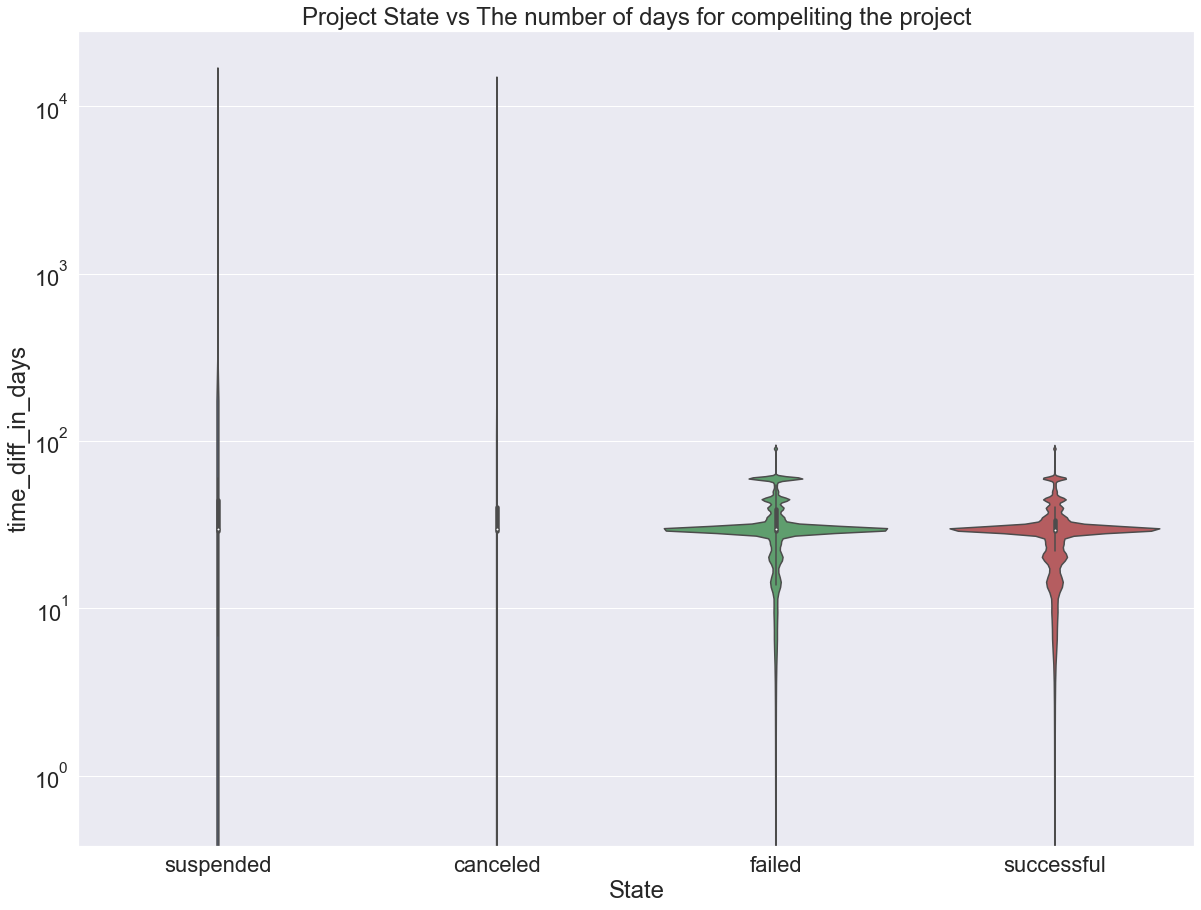

In [51]:
sns.set(rc={'figure.figsize':(20,15)})
sns.set(font_scale = 2)
ax = sns.violinplot(x="State",y="time_diff_in_days",  data=df_new, order = ['suspended', 'canceled', 'failed', 'successful'])
ax.set_yscale("log")
plt.title("Project State vs The number of days for compeliting the project")

**It can be seen that the distribution for the number days a project takes is high for all states except for cancelled or suspended ones, which have very low distribution and higher means than others. Additional observation is that the lower number of days a project takes on average to be completed, it has less probability to be cancelled or suspended**

Text(0.5, 1.0, 'Project State vs The Amount of excess fund')

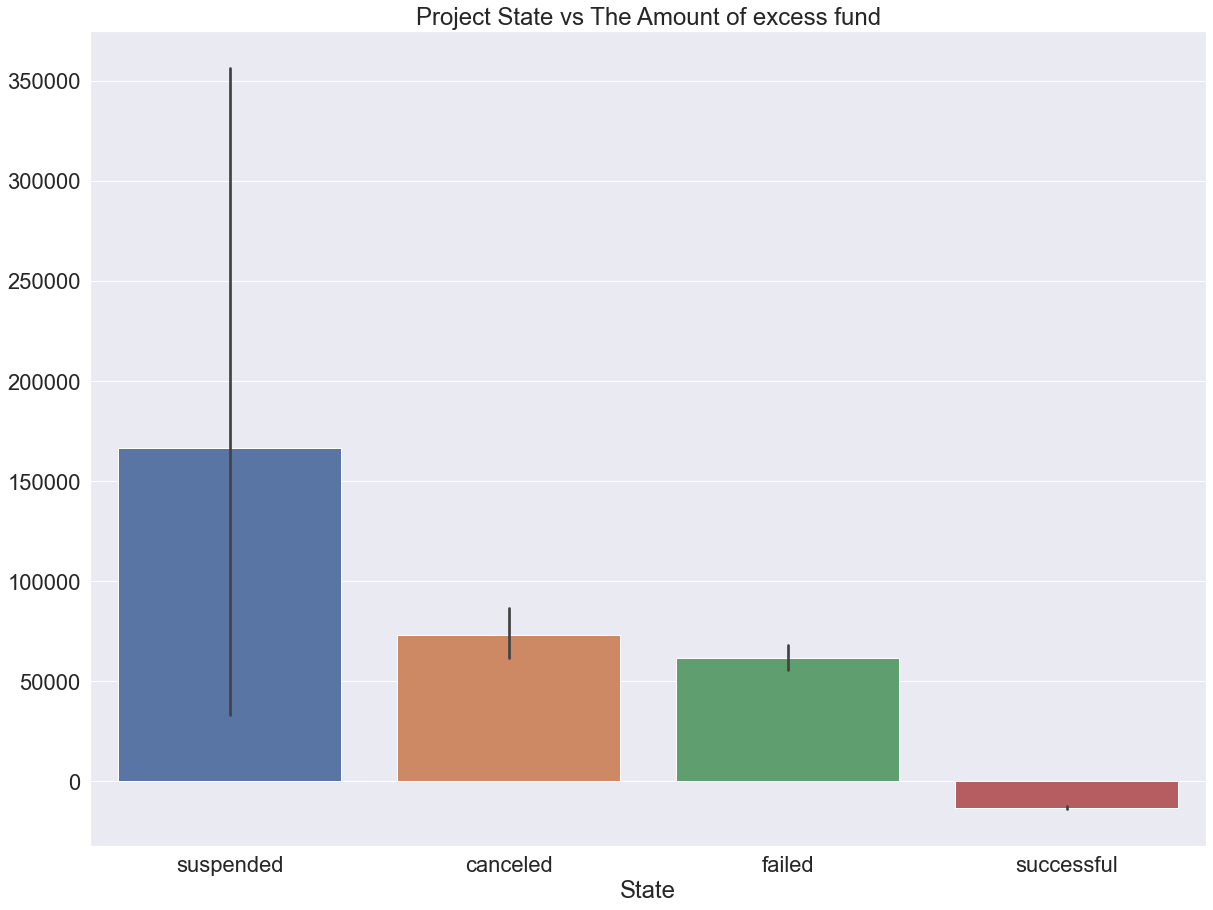

In [52]:
sns.set(rc={'figure.figsize':(20,15)})
sns.set(font_scale = 2)
excess_money = df_new['usd_goal_real'] - df_new['usd_pledged_real']
ax = sns.barplot(x="State",y=excess_money,  data=df_new, order = ['suspended', 'canceled', 'failed', 'successful'])
plt.title("Project State vs The Amount of excess fund")

**We can see from above chart two main observations that make difference between successful projects and unsuccessful ones:<br>
1- Successful projects tend to have more backers.<br>
2- Successful projects usually end up with exccess fund
<br>**

There are three remaining aspects to look from:
1. Does the country where the project takes place contrbute towards its successful?
2. Does certin project's main category has influance over the project success? where some categories are more demnaded.
3. Does successful projects require less money than unsccessful ones? making them more attractive for backers


Text(0.5, 1.0, 'Project State vs The Amount of fund needed for the project')

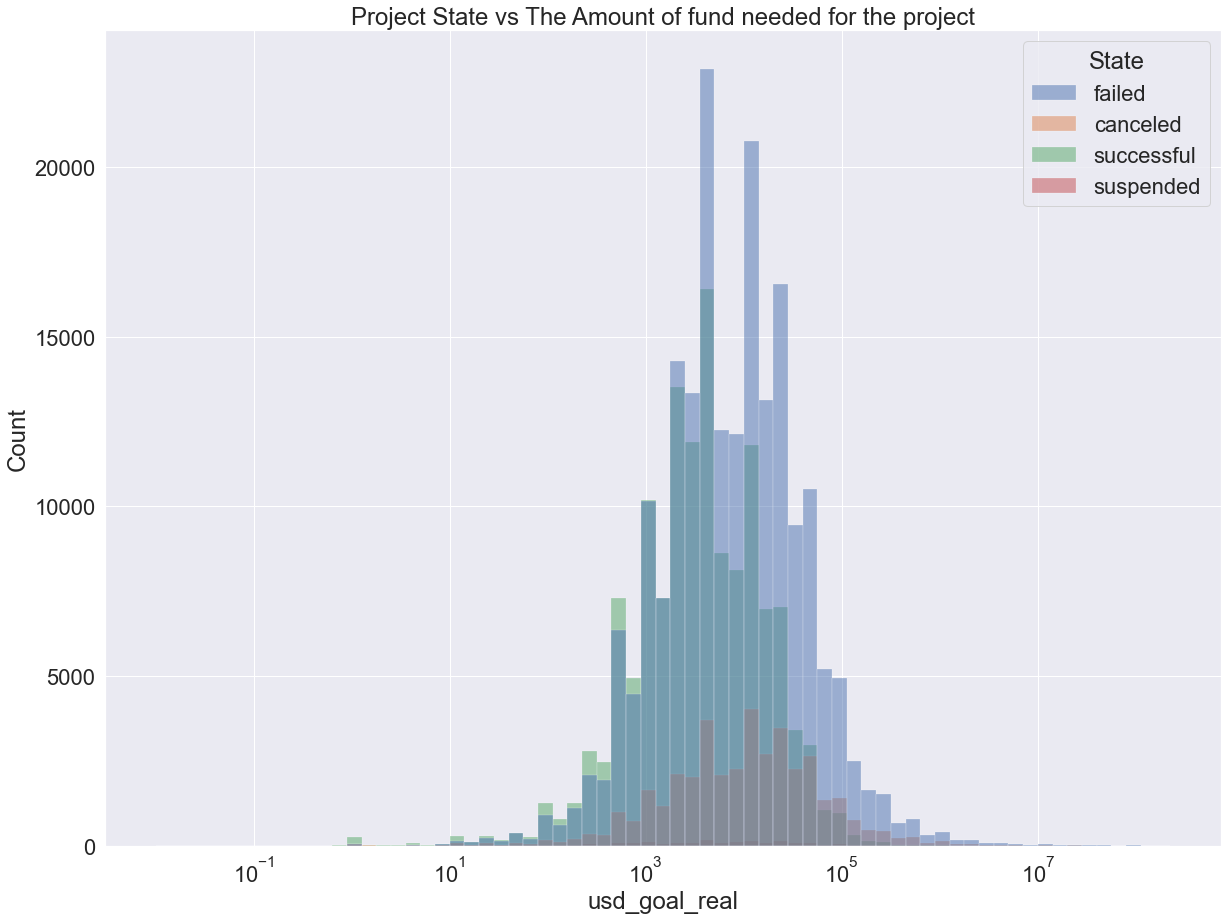

In [53]:
sns.set(rc={'figure.figsize':(20,15)})
sns.set(font_scale = 2)
sns.histplot(df_new, x="usd_goal_real",hue="State", binwidth = .15, edgecolor="1", linewidth=0.2, log_scale=True)
plt.title("Project State vs The Amount of fund needed for the project")

**The figure above shows that successful project cost usually falls between 1000 USD and 10000 USD, While failed projects and cancelled ones usually cost higher than 10000 USD.**

I will go through the distribution of the main categories and the countries of those project.

<AxesSubplot:xlabel='State,country'>

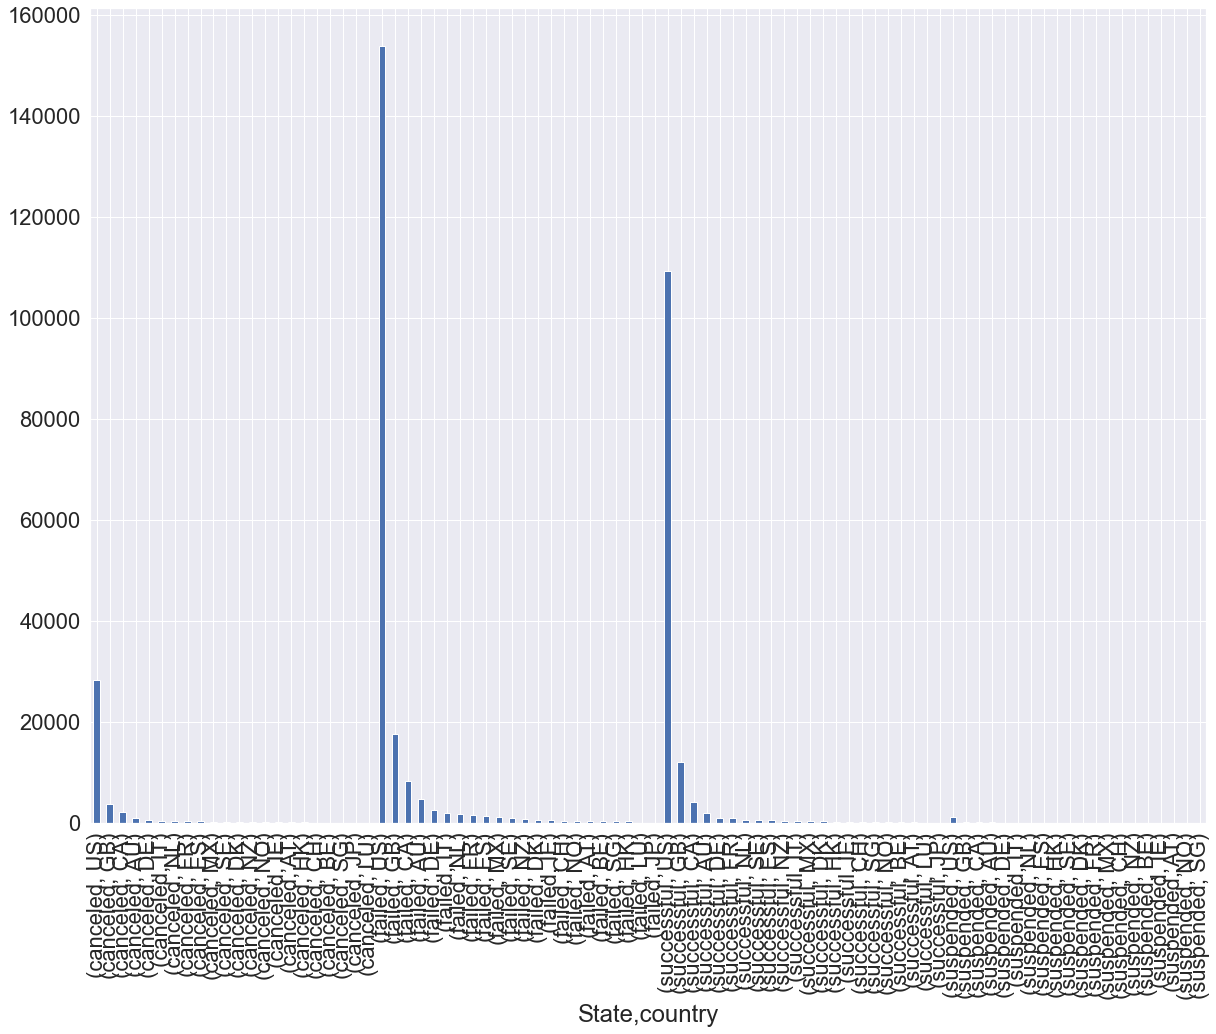

In [54]:
df_new.groupby(['State'])['country'].value_counts().plot(kind='bar')

In [55]:
df3 = pd.get_dummies(df_new[['main_category']], prefix="", prefix_sep="")
df3['State'] = df_new['State'] 
fixed_columns = [df3.columns[-1]] + list(df3.columns[:-1])
df3 = df3[fixed_columns]
df3_grouped = df3.groupby('State').mean().reset_index()
df3_grouped = df3_grouped.transpose()
df3_grouped.columns = df3_grouped.iloc[0]
df3_grouped.drop(index=df3_grouped.index[0], 
        axis=0, 
        inplace=True)
df3_grouped.head(15)

State,canceled,failed,successful,suspended
Art,0.06,0.07,0.09,0.05
Comics,0.02,0.02,0.04,0.01
Crafts,0.02,0.03,0.02,0.04
Dance,0.0,0.01,0.02,0.01
Design,0.11,0.08,0.08,0.13
Fashion,0.07,0.07,0.04,0.07
Film & Video,0.15,0.17,0.18,0.06
Food,0.06,0.08,0.05,0.08
Games,0.16,0.08,0.09,0.12
Journalism,0.01,0.02,0.01,0.03


Text(0.5, 1.0, 'Project State vs Project Categories')

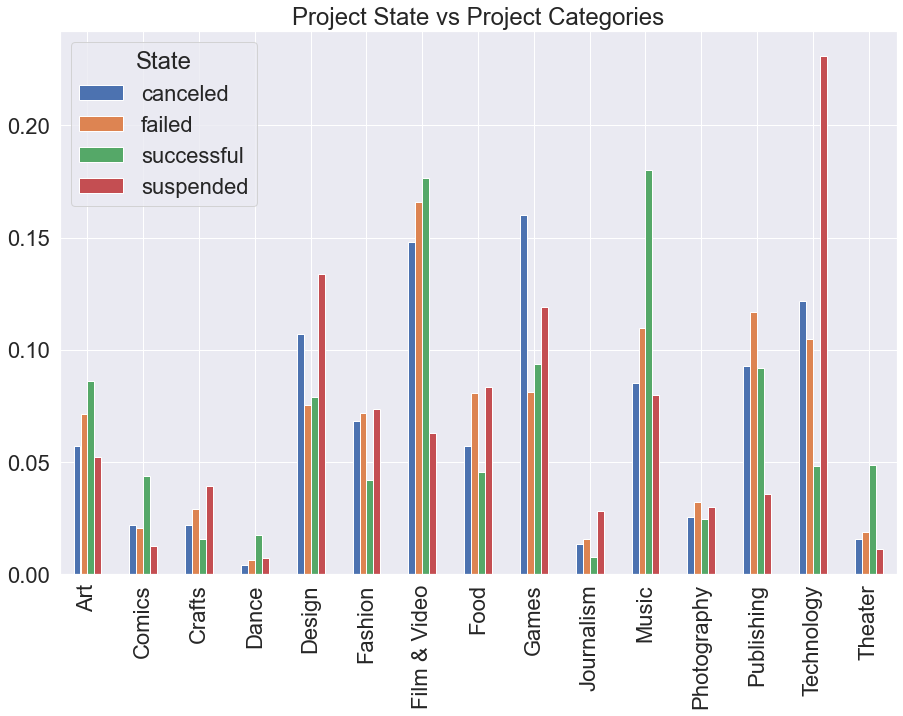

In [56]:
df3_grouped.plot(kind = 'bar', figsize = (15, 10), sort_columns=True)
plt.title("Project State vs Project Categories")

##### From above it can be seen that there are 4 features that seems to be affecting the projects success:<br>
1. Number of backers
2. The amout of money a project needs to be completed
3. The number of days for project to be completed (it is not very crucial when it comes to the difference between failed and successful projects) 
4. The project related industrey (is the project realted to music industrey, games, art,...etc)

* The amount of pledged money can be argued about whether to be included or not as it is not directly controlled. 

## Section 4: Data Modeling

#### Since the main question at the begining of this project was to predict if a project is going to success or not regardless of whither the unsuccessful project failed, canceled, or suspended. Hence, additonal column will be added which consists of zeros and ones. One will be asigned to successful project and zero will asigned to unsuccessful projects. At the end this is like a bank load project, an investor would like to know if a project worth investing in or not.

In [57]:
df_new.head() ## Reviewing the the date frame

,name,category,main_category,deadline,launched,backers,country,usd_pledged_real,usd_goal_real,time_diff_in_days,State
0,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11 12:12:28,0,GB,0.00,"1,533.95",58.46,failed
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02 04:43:57,15,US,"2,421.00","30,000.00",59.79,failed
2,Where is Hank?,Narrative Film,Film & Video,2013-02-26,2013-01-12 00:20:50,3,US,220.00,"45,000.00",44.96,failed
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-04-16,2012-03-17 03:24:11,1,US,1.00,"5,000.00",29.83,failed
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,2015-08-29,2015-07-04 08:35:03,14,US,"1,283.00","19,500.00",55.62,canceled


In [58]:
df2 = df_new.copy()
df2[df2['State'] == 'successful']
df2['Successful_or_not'] = np.where(df2['State'] == 'successful', 1, 0)


In [59]:
df2[df2['State'] == 'successful']


,name,category,main_category,deadline,launched,backers,country,usd_pledged_real,usd_goal_real,time_diff_in_days,State,Successful_or_not
5,Monarch Espresso Bar,Restaurants,Food,2016-04-01,2016-02-26 13:38:27,224,US,"52,375.00","50,000.00",34.42,successful,1
6,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,2014-12-21,2014-12-01 18:30:44,16,US,"1,205.00","1,000.00",19.21,successful,1
11,Lisa Lim New CD!,Indie Rock,Music,2013-04-08,2013-03-09 06:42:58,100,US,"12,700.00","12,500.00",29.71,successful,1
14,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,2017-05-03,2017-04-05 19:44:18,761,GB,"121,857.33","6,469.73",27.17,successful,1
18,Mike Corey's Darkness & Light Album,Music,Music,2012-08-17,2012-08-02 14:11:32,7,US,250.00,250.00,14.38,successful,1
...,...,...,...,...,...,...,...,...,...,...,...,...
378642,ÉPOUVANTAILS : 28mm Figurines de jeux pour KIN...,Tabletop Games,Games,2017-10-31,2017-10-04 11:26:44,35,FR,"1,452.47","1,165.70",26.50,successful,1
378644,The Manual Bar Blade,Product Design,Design,2015-12-15,2015-11-23 07:33:14,120,US,"6,169.00","3,500.00",21.67,successful,1
378646,The Dog Coffee Book,Children's Books,Publishing,2013-11-30,2013-10-18 21:35:04,31,US,"1,732.02",950.00,42.08,successful,1
378651,AT THE BEACH,Classical Music,Music,2014-03-22,2014-02-20 01:00:16,78,CA,"4,983.69","4,529.81",29.92,successful,1


**After I added the additional column, I need to change categorical variables to numeric using *get_dummies* from pandas library**

In [60]:
df2 = pd.get_dummies(df2, prefix = ['main_category'], prefix_sep = "_", columns=['main_category'])
df2;

In [61]:
df2.columns

Index(['name', 'category', 'deadline', 'launched', 'backers', 'country',
       'usd_pledged_real', 'usd_goal_real', 'time_diff_in_days', 'State',
       'Successful_or_not', 'main_category_Art', 'main_category_Comics',
       'main_category_Crafts', 'main_category_Dance', 'main_category_Design',
       'main_category_Fashion', 'main_category_Film & Video',
       'main_category_Food', 'main_category_Games', 'main_category_Journalism',
       'main_category_Music', 'main_category_Photography',
       'main_category_Publishing', 'main_category_Technology',
       'main_category_Theater'],
      dtype='object')

In [62]:
(df2['Successful_or_not'].value_counts()/df2['Successful_or_not'].count())*100

0   64.29
1   35.71
Name: Successful_or_not, dtype: float64

Now two model will be built for this classification problem:<br>
1. Using decision tree
2. Using Naive Bayes

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score

**Below a grid search is used to check different the decision tree performance using different values for the hyper parameters, and 5 cross validation folds**<br>

In [64]:
parameters = {'criterion':('gini', 'entropy'), 'splitter':['best', 'random']}
DT = DecisionTreeClassifier()
clf = GridSearchCV(DT, parameters, cv = 5)

In [65]:
clf2 = GaussianNB()

**Befroe proceeding by using the models above, I need to devdied the data to train, and test. Validation will occure using cross validation in search grid function, or in cross validation score function**

def train_test_validation(X, y):
    """This function returns the types of sets: training set, validation set, and testing set"""
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
    X_train2, X_valid, y_train2, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state=0)
    
    return X_train, X_test, y_train, y_test, X_train2, X_valid, y_train2, y_valid
    

In [66]:
X = df2[['main_category_Art', 'main_category_Comics',
       'main_category_Crafts', 'main_category_Dance', 'main_category_Design',
       'main_category_Fashion', 'main_category_Film & Video',
       'main_category_Food', 'main_category_Games', 'main_category_Journalism',
       'main_category_Music', 'main_category_Photography',
       'main_category_Publishing', 'main_category_Technology',
       'main_category_Theater', 'backers', 'usd_goal_real', 'time_diff_in_days']]
y = df2['Successful_or_not']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0) #Test set is only 20% of the whole set

In [68]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'splitter': ['best', 'random']})

**Below are the ranking of the decision tree with different hyper parameter values, the one with rank one is the best fit**

In [69]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.84,0.06,0.02,0.00,gini,best,"{'criterion': 'gini', 'splitter': 'best'}",0.90,0.90,0.90,0.90,0.90,0.90,0.00,2
1,0.33,0.03,0.02,0.01,gini,random,"{'criterion': 'gini', 'splitter': 'random'}",0.90,0.90,0.90,0.90,0.90,0.90,0.00,4
2,0.81,0.01,0.02,0.00,entropy,best,"{'criterion': 'entropy', 'splitter': 'best'}",0.90,0.90,0.90,0.90,0.90,0.90,0.00,1
3,0.33,0.06,0.02,0.01,entropy,random,"{'criterion': 'entropy', 'splitter': 'random'}",0.90,0.90,0.90,0.90,0.90,0.90,0.00,3


In [70]:
DT2 = DecisionTreeClassifier( criterion='entropy', splitter='best') #Choosing the best fit is highlighted below

In [71]:
DT2 = DT2.fit(X_train, y_train)

In [72]:
DT2.score(X_train, y_train)

0.9983759737487995

In [73]:
y_pred = DT2.predict(X_test)

In [74]:
print(accuracy_score(y_test, y_pred), recall_score(y_test, y_pred) , precision_score(y_test, y_pred), f1_score(y_test, y_pred) )

0.9009577419699072 0.8574442435201929 0.8620885572516193 0.8597601284351686


**Reconfirming the results above by using cross validation score**

In [75]:
scores = cross_val_score(DT2, X, y, cv=5, scoring='f1')

In [76]:
scores.mean()

0.8611824243045199

**Now I will use GuassianNB and check the accuracy and F1 score and utilize cross validation**

In [77]:
clf2 = clf2.fit(X_train, y_train)
clf2.score(X_train, y_train)

0.4155406306690855

In [78]:
y_pred2 = clf2.predict(X_test)
print(accuracy_score(y_test, y_pred2), recall_score(y_test, y_pred2) , precision_score(y_test, y_pred2), f1_score(y_test, y_pred2))

0.4130695763525771 0.9983423749246534 0.37611592886441375 0.5463861197307244


In [79]:
scores = cross_val_score(clf2, X, y, cv=5, scoring='f1')

In [80]:
scores.mean()

0.5498239097334323

#### From Above it can be seen based on F1 score metric, as it is the most accurate metric for classification problems, that decision tree classifier outperforms the GuassianNB with an F1 score of 0.86 against 0.55

### Now I will try to utilize deep learning model to see if better prediction can be achived or not

In [1]:
import keras

In [2]:
from sklearn import preprocessing, model_selection

In [81]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [86]:
def benchmark(model, test):
    y_pred = model.predict(test)

    print(f"F1 Score: {f1_score(y_test, y_pred):,.2f}")

In [104]:
test_model = keras.Sequential([
    keras.layers.InputLayer(input_shape=X.shape[1:]),
    keras.layers.Dense(units=10, activation="relu"),
    keras.layers.Dense(units=1, activation="sigmoid")
])
test_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
test_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                190       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [105]:
test_model.fit(X_train, y_train, epochs=20, validation_split=.25, verbose=1)


Epoch 1/20
7029/7029 [==============================] - 3s 497us/step - loss: 0.4635 - accuracy: 0.7875 - val_loss: 0.3592 - val_accuracy: 0.8482
Epoch 2/20
7029/7029 [==============================] - 3s 492us/step - loss: 0.3160 - accuracy: 0.8686 - val_loss: 0.2863 - val_accuracy: 0.8781
Epoch 3/20
7029/7029 [==============================] - 3s 489us/step - loss: 0.2697 - accuracy: 0.8877 - val_loss: 0.2564 - val_accuracy: 0.8946
Epoch 4/20
7029/7029 [==============================] - 3s 488us/step - loss: 0.2491 - accuracy: 0.8965 - val_loss: 0.2453 - val_accuracy: 0.9020
Epoch 5/20
7029/7029 [==============================] - 3s 495us/step - loss: 0.2385 - accuracy: 0.9010 - val_loss: 0.2347 - val_accuracy: 0.9016
Epoch 6/20
7029/7029 [==============================] - 3s 493us/step - loss: 0.2316 - accuracy: 0.9042 - val_loss: 0.2301 - val_accuracy: 0.9051
Epoch 7/20
7029/7029 [==============================] - 3s 492us/step - loss: 0.2263 - accuracy: 0.9070 - val_loss: 0.2236 -

In [106]:
results = test_model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

586/586 [==============================] - 0s 330us/step - loss: 0.4383 - accuracy: 0.8758
test loss, test acc: [0.43833571672439575, 0.8757870197296143]
